In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import pandas as pd
import scipy.stats as stats
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from scipy.stats import ttest_ind
import warnings
warnings.filterwarnings('ignore')


In [3]:
data = pd.read_csv("eitc.csv.bz2", sep ='\t')
data.head(5)



,year,urate,children,nonwhite,finc,earn,age,ed,work
0,1991,7.6,0,1,18714.394273,18714.394273,26,10,1
1,1991,7.2,1,0,4838.568282,471.365639,22,9,1
2,1991,6.4,2,0,8178.193833,0.000000,33,11,0
3,1991,9.1,0,1,9369.570485,0.000000,43,11,0
4,1991,8.6,3,1,14706.607930,14706.607930,23,7,1


In [4]:
data.shape

(13746, 9)

In [5]:
data.describe()

,year,urate,children,nonwhite,finc,earn,age,ed,work
count,13746.000000,13746.000000,13746.000000,13746.000000,13746.000000,13746.000000,13746.000000,13746.000000,13746.000000
mean,1993.347083,6.761734,1.192638,0.600684,15255.319310,10432.475514,35.209661,8.806053,0.513022
std,1.703207,1.462464,1.382105,0.489776,19444.249684,18200.758138,10.157128,2.635639,0.499849
min,1991.000000,2.600000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000
25%,1992.000000,5.700000,0.000000,0.000000,5123.417782,0.000000,26.000000,7.000000,0.000000
50%,1993.000000,6.800000,1.000000,1.000000,9636.664360,3332.179931,34.000000,10.000000,1.000000
75%,1995.000000,7.700000,2.000000,1.000000,18659.178178,14321.223709,44.000000,11.000000,1.000000
max,1996.000000,11.400000,9.000000,1.000000,575616.820870,537880.611850,54.000000,11.000000,1.000000


In [6]:
print(data['year'].max())
print(data['year'].min())

1996
1991


In [7]:
df = data[['children','work','year']]
df['child_category'] = ['2+' if x >= 2 else x for x in df['children']] 
df2 = df
df = df[df.year != 1991]
df = df[df.year != 1992]
df = df[df.year != 1994]
df = df[df.year != 1995]
df = df[df.year != 1996]
df2 = df2[df2.year != 1991]
df2 = df2[df2.year != 1992]
df2 = df2[df2.year != 1995]
df2 = df2[df2.year != 1996]
df2 = df2[df2.year != 1993]

In [8]:
df.head(5)

,children,work,year,child_category
102,0,1,1993,0
103,0,0,1993,0
104,3,0,1993,2+
105,3,0,1993,2+
106,0,1,1993,0


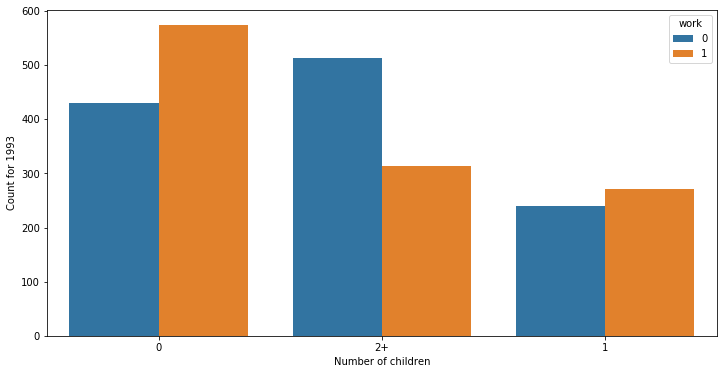

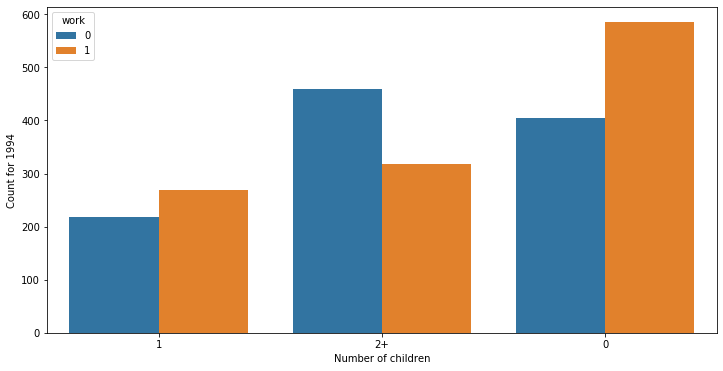

In [9]:
from seaborn import countplot
from matplotlib.pyplot import figure, show
figure(figsize=(12,6))
ax = countplot(data = df,x= df.child_category, hue="work")
ax.set_xlabel("Number of children")
ax.set_ylabel("Count for 1993")
show()
figure(figsize=(12,6))
ax = countplot(data=df2,x = df2.child_category, hue="work")
ax.set_xlabel("Number of children")
ax.set_ylabel("Count for 1994")
show()

In [10]:
print("From the graphs we can see that there is a very marginal difference between the two years 1993 and 1994. In both the years more people have no children and the people having no children are likely to be working. When we talk about those have one child and those who have more than two children we can see that the numbers are almost suddenly decreasing.During 1993 the trend was such that people having one child worked more as compared to those who had two or more")
print("Thus we can see that over the years the proability to work DECREASES as the number of children INCREASE")

From the graphs we can see that there is a very marginal difference between the two years 1993 and 1994. In both the years more people have no children and the people having no children are likely to be working. When we talk about those have one child and those who have more than two children we can see that the numbers are almost suddenly decreasing.During 1993 the trend was such that people having one child worked more as compared to those who had two or more
Thus we can see that over the years the proability to work DECREASES as the number of children INCREASE


In [11]:
#Differences at baseline :
baseline = data.loc[(data.year == 1993) & (data.work == 1),]
#Dropping the non- demographic variables
baseline = baseline.drop ('finc',axis = 1)
baseline = baseline.drop ('earn',axis = 1)
bl_treat = baseline.loc[baseline.children >= 1].dropna()
bl_control = baseline.loc[baseline.children == 0].dropna()

#print(bl_control.dtypes)
#Drop string containing columns
bl_treat.drop(['year','work','children'], axis=1, inplace=True)
bl_control.drop(['year','work','children'], axis=1, inplace=True)

mtreat = bl_treat.mean()
mcontrol = bl_control.mean()
diff = bl_treat.mean() - bl_control.mean()
output = pd.concat([mtreat, mcontrol, diff], axis=1).reset_index()
output.rename(columns={'index': 'Variable name', 0: 'Average value (Treatment group)', 
                       1: 'Average value (Control group)', 2: "Difference(Treat - Control)"}, inplace=True)
diff_p = []
for column in bl_control:
    __, p_value = ttest_ind(bl_treat[column], bl_control[column])
    diff_p.append({'p-value': p_value})
diff_p = pd.DataFrame(diff_p)
final_output = pd.concat([output, diff_p], axis=1)
pd.concat([output, diff_p], axis=1)

,Variable name,Average value (Treatment group),Average value (Control group),Difference(Treat - Control),p-value
0,urate,7.148718,7.042334,0.106383,2.129648e-01
1,nonwhite,0.623932,0.472125,0.151806,1.812928e-07
2,age,33.475214,37.942509,-4.467295,1.909031e-14
3,ed,9.205128,8.923345,0.281783,4.778968e-02


In [12]:
print("From our analysis, we can see that a valid treatment group would be those families that have atleast one child or more for the reform of 1993")

From our analysis, we can see that a valid treatment group would be those families that have atleast one child or more for the reform of 1993


In [13]:
#Measuring Impact
#Before- After Estimator :
t_df = data[(data['work'] == 1) & (data['children'] >= 1)]
t_df =t_df.loc[:,['work', 'year','ed']]

t_93_df = t_df[t_df['year'] == 1993]
t_94_df = t_df[t_df['year'] >= 1994]

#For mean sc to give enroll percentage from 0-100, instead of 0-1
t_93_df.loc[:,'work'] *= 100   #.loc to prevent SettingWithCopyWarning 
t_94_df.loc[:,'work'] *= 100   

#Mean for each poor village
mean_93_df = t_93_df.groupby('work' , as_index = False).mean()
mean_94_df = t_94_df.groupby('work' , as_index = False).mean()


In [14]:
print("The before years are 1993 and the after years are all the years starting 1994 aka 1994 to 1996 as per our data")

The before years are 1993 and the after years are all the years starting 1994 aka 1994 to 1996 as per our data


In [15]:
pre_treat_df =   data[(data['year'] == 1993) & (data['work'] == 1) & (data['children'] >= 1)]
pre_ctrl_df =   data[(data['year'] == 1993) & (data['work'] == 0) & (data['children'] == 0)]

# Calculating means
treat_mean_1 = pre_treat_df['finc'].mean()
control_mean_1= pre_ctrl_df['finc'].mean()

# Running T-Test
tt_93 = stats.ttest_ind(pre_treat_df['finc'],pre_ctrl_df['finc'], nan_policy='omit')

# Adding to data frame
pd.DataFrame.from_items([('Control Mean', [control_mean_1]), 
                         ('Treatment Mean', [treat_mean_1]), 
                         ('Difference', [treat_mean_1 - control_mean_1]),
                         ('T Value', [tt_93[0]]), ('P Value', [tt_93[1]])])

,Control Mean,Treatment Mean,Difference,T Value,P Value
0,12371.051726,15460.012386,3088.960659,3.364997,0.000794


In [16]:
post_treat_df =   data[(data['year'] >= 1994) & (data['work'] == 1) & (data['children'] >= 1)]
post_ctrl_df =   data[(data['year'] >= 1994) & (data['work'] == 0) & (data['children'] == 0)]

# Calculating means
treat_mean = post_treat_df['finc'].mean()
control_mean = post_ctrl_df['finc'].mean()

# Running T-Test
tt_94 = stats.ttest_ind(post_treat_df['finc'],post_ctrl_df['finc'], nan_policy='omit')

# Adding to data frame
pd.DataFrame.from_items([('Control Mean', [control_mean]), 
                         ('Treatment Mean', [treat_mean]), 
                         ('Difference', [treat_mean - control_mean]),
                         ('T Value', [tt_94[0]]), ('P Value', [tt_94[1]])])

,Control Mean,Treatment Mean,Difference,T Value,P Value
0,12899.912081,17004.681131,4104.76905,6.266347,4.238018e-10


In [17]:
# Fitting linear model
df_93 = data[(data['year'] == 1993)]

multi_model = smf.ols(formula = 'finc ~ work+ ed + earn + children + urate + nonwhite ', data = df_93)
multi_res=multi_model.fit()

# Print
print("\nMultiple regression : Families in 1993 - Treatment/Control and Age, Earnings , No of Children etc")
print(multi_res.summary())


Multiple regression : Families in 1993 - Treatment/Control and Age, Earnings , No of Children etc
                            OLS Regression Results                            
Dep. Variable:                   finc   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     2510.
Date:                Mon, 16 Mar 2020   Prob (F-statistic):               0.00
Time:                        20:48:21   Log-Likelihood:                -23683.
No. Observations:                2342   AIC:                         4.738e+04
Df Residuals:                    2335   BIC:                         4.742e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

In [18]:
# Fitting linear model
df_94 = data[(data['year'] >= 1994)]

multi_model = smf.ols(formula = 'finc ~ work + ed + earn + children + urate + nonwhite ', data = df_94)
multi_res=multi_model.fit()

# Print
print("\nMultiple regression : Families in 1993 - Treatment/Control and Age, Earnings , No of Children etc")
print(multi_res.summary())


Multiple regression : Families in 1993 - Treatment/Control and Age, Earnings , No of Children etc
                            OLS Regression Results                            
Dep. Variable:                   finc   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     9197.
Date:                Mon, 16 Mar 2020   Prob (F-statistic):               0.00
Time:                        20:48:21   Log-Likelihood:                -65133.
No. Observations:                6345   AIC:                         1.303e+05
Df Residuals:                    6338   BIC:                         1.303e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

In [19]:
# Considering only 1993
df_93 = data[(data['year'] == 1993)]


# Fitting linear model
simple_model = smf.ols(formula = 'children ~ work', data = df_93)
simple_res=simple_model.fit()

# Print
print("\nSimple regression : Families in 1993 - Treatment/Control")
print(simple_res.summary())


Simple regression : Families in 1993 - Treatment/Control
                            OLS Regression Results                            
Dep. Variable:               children   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     83.55
Date:                Mon, 16 Mar 2020   Prob (F-statistic):           1.31e-19
Time:                        20:48:21   Log-Likelihood:                -4014.4
No. Observations:                2342   AIC:                             8033.
Df Residuals:                    2340   BIC:                             8044.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

In [20]:
# Considering only 1994 onwards
df_94 = data[(data['year'] >= 1994)]


# Fitting linear model
simple_model = smf.ols(formula = 'children ~ work', data = df_94)
simple_res=simple_model.fit()

# Print
print("\nSimple regression : Families in 1994 and onwards - Treatment/Control")
print(simple_res.summary())


Simple regression : Families in 1994 and onwards - Treatment/Control
                            OLS Regression Results                            
Dep. Variable:               children   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     116.3
Date:                Mon, 16 Mar 2020   Prob (F-statistic):           6.88e-27
Time:                        20:48:21   Log-Likelihood:                -11022.
No. Observations:                6345   AIC:                         2.205e+04
Df Residuals:                    6343   BIC:                         2.206e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

In [21]:
print('\nSimple Model - Standard Errors\n', simple_res.bse)
print('\nModel with Controls - Standard Errors\n', multi_res.bse)


Simple Model - Standard Errors
 Intercept    0.025093
work         0.034570
dtype: float64

Model with Controls - Standard Errors
 Intercept    558.324588
work         184.978111
ed            34.067510
earn           0.004510
children      64.955691
urate         71.429731
nonwhite     190.579953
dtype: float64


In [22]:
#Difference in Difference Estimator using the a 4 way simple table :
#Using 1997 and 1998, looking at difference across treatment and control for POOR families
# Computing the means required for difference in difference
PreControlMean =    data[(data['children'] == 0) & (data['year'] == 1993) & (data['work'] == 0)].mean()['finc']
PostControlMean =    data[(data['children'] == 0) & (data['year'] >= 1994) & (data['work'] == 1)].mean()['finc']

PreTreatMean =    data[(data['children'] >= 1) & (data['year'] == 1993) & (data['work'] == 0)].mean()['finc']
PostTreatMean =    data[(data['children'] >= 1) & (data['year'] >= 1994) & (data['work'] == 1)].mean()['finc']

ControlDiff =   PostControlMean - PreControlMean
TreatmentDiff = PostTreatMean - PreTreatMean
DiffInDiff =    TreatmentDiff - ControlDiff

# Arranging means in a table using Series
diff_table = {'Before EITC (93)':pd.Series([PreControlMean, PreTreatMean, ControlDiff], index = ['Control', 'Treatment', 'Difference']),
       'After EITC (94)':pd.Series([PostControlMean, PostTreatMean, TreatmentDiff], index = ['Control', 'Treatment', 'Difference']),}

print("\  Families in 1993 - Treatment/Control and demographic factors")
print (pd.DataFrame(diff_table))
print('\nThe difference in difference is :', DiffInDiff)

\  Families in 1993 - Treatment/Control and demographic factors
            Before EITC (93)  After EITC (94)
Control         12371.051726     22420.521810
Treatment        8931.943753     17004.681131
Difference      10049.470084      8072.737378

The difference in difference is : -1976.7327059782638


In [23]:
print("From our analysis we can see that the growth EITC increase in working families having one or more children.The increase is almost by 5% points for the control group")

From our analysis we can see that the growth EITC increase in working families having one or more children.The increase is almost by 5% points for the control group


In [24]:
print("Yes we see from the regression that the effect is statistically significant")

Yes we see from the regression that the effect is statistically significant


In [25]:
print("The counterfactual assumption here is that: ")
print("1.We comapare EITC increase/decrease for families eligible for EITC (those with children) and those not eligible (those with no children)")
print("2.We do not use longitudinal data, which allow us to account for unobserved, household-specific, time-invariant factors that affect employment. Longitudinal data also help us avoid bias due to (unobserved) changes in the composition of “treatment” and “control”groups. Thus our treatment and control groups are biased ")
print("3. We assume that the data contains those groups that are eligible for EITC,always file for it and claim it")
print("4.We are assuming parallel trends. This may or may not be true. We are assuming that the experiment was perfectly randomized. This may or may not be true either.")
print("5.There are not preexisting trends that are driving the results.")
print("All these assumptions are convincing as we are trying to understand the effect of a policy without taking external conditions such as the economy at the time into account, thus when we try to attribute the working conditions and earnings to EITC, these assumptions help narrow down the factors, normalize errors in diff in diff estimator and understand the relationship between covariants")
print("Most of these assumptions are okay for our analysis but not plausible")

The counterfactual assumption here is that: 
1.We comapare EITC increase/decrease for families eligible for EITC (those with children) and those not eligible (those with no children)
2.We do not use longitudinal data, which allow us to account for unobserved, household-specific, time-invariant factors that affect employment. Longitudinal data also help us avoid bias due to (unobserved) changes in the composition of “treatment” and “control”groups. Thus our treatment and control groups are biased 
3. We assume that the data contains those groups that are eligible for EITC,always file for it and claim it
4.We are assuming parallel trends. This may or may not be true. We are assuming that the experiment was perfectly randomized. This may or may not be true either.
5.There are not preexisting trends that are driving the results.
All these assumptions are convincing as we are trying to understand the effect of a policy without taking external conditions such as the economy at the time into 

In [26]:
print("After including covariants,the difference in difference estimator is larger and more statistically significant.")
print("Here we see that that including the nonwhite variable, shows us that a nonwhite family is less likely to be working.")
print("The local unemployment rate does affect the work, but it is not statistically significant")
print("The treatment effect is strongest for families with two or more children.  This makes sense, since the EITC increases for 2 children, lending greater credibility to the results.")
print("We also observe that adding education as one of the covariants does not affect the results")

After including covariants,the difference in difference estimator is larger and more statistically significant.
Here we see that that including the nonwhite variable, shows us that a nonwhite family is less likely to be working.
The local unemployment rate does affect the work, but it is not statistically significant
The treatment effect is strongest for families with two or more children.  This makes sense, since the EITC increases for 2 children, lending greater credibility to the results.
We also observe that adding education as one of the covariants does not affect the results


In [27]:
print("Thus we can say that the diff in diff regression model tells us that EITC is statistically significant and children, non white greatly influence the earnings of families during the time")

Thus we can say that the diff in diff regression model tells us that EITC is statistically significant and children, non white greatly influence the earnings of families during the time


In [28]:
print("TEXT CLASSIFICATION :")

TEXT CLASSIFICATION :


In [29]:
#IPython is what you are using now to run the notebook
import IPython
print( "IPython version:      %6.6s (need at least 1.0)" % IPython.__version__)

# Numpy is a library for working with arrays and matrices
import numpy as np
print( "Numpy version:        %6.6s (need at least 1.7.1)" % np.__version__)

# SciPy implements many different numerical algorithms
import scipy as sp
print( "SciPy version:        %6.6s (need at least 0.12.0)" % sp.__version__)

# Pandas makes working with data tables easier
import pandas as pd
print( "Pandas version:       %6.6s (need at least 0.11.0)" % pd.__version__)

# Module for plotting
import matplotlib.pyplot as plt  
from pylab import *
print( "Matpltolib version:    %6.6s (need at least 1.2.1)" %
       matplotlib.__version__)
%matplotlib inline
# necessary for in-line graphics

# SciKit Learn implements several Machine Learning algorithms
import sklearn
print("Scikit-Learn version: %6.6s (need at least 0.13.1)" %
       sklearn.__version__)
import os
# for certain system-related functions

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

IPython version:       7.8.0 (need at least 1.0)
Numpy version:        1.17.2 (need at least 1.7.1)
SciPy version:         1.3.1 (need at least 0.12.0)
Pandas version:       0.25.1 (need at least 0.11.0)
Matpltolib version:     3.1.1 (need at least 1.2.1)
Scikit-Learn version: 0.22.2 (need at least 0.13.1)


In [41]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation,TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier

from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import RegexpTokenizer

In [42]:
# Reading the world Value data
df = pd.read_csv("amazon-reviews.csv.bz2", sep ='\t')

In [43]:
print(df.shape)
df.head(10)

(205331, 4)


,date,summary,review,rating
0,2013-07-16,Awesine,Perfect for new parents. We were able to keep ...,5
1,2013-06-29,Should be required for all new parents!,This book is such a life saver. It has been s...,5
2,2014-03-19,Grandmother watching baby,Helps me know exactly how my babies day has go...,5
3,2013-08-17,repeat buyer,I bought this a few times for my older son and...,5
4,2014-04-01,Great,I wanted an alternative to printing out daily ...,4
5,2014-05-10,"Great for basics, but not detail","This is great for basics, but I wish the space...",4
6,2013-07-17,Perfect for the working mom,My 3 month old son spend half of his days with...,5
7,2013-01-27,Great for newborns,This book is perfect! I'm a first time new mo...,5
8,2014-04-22,"It's ok, but I liked a regular weekly planner ...","I wanted to love this, but it was pretty expen...",3
9,2013-11-19,Best for Tracking!,The Baby Tracker brand books are the absolute ...,5


In [44]:
df.isna().sum()

date        0
summary    15
review     80
rating      0
dtype: int64

In [45]:
df=df.dropna(subset=["review"])
df.shape

(205251, 4)

In [46]:
np.random.seed(1)
amzrev_df_sample=df.sample(10000) #Taking a sample of 10k observations
amzrev_df_sample=pd.DataFrame(amzrev_df_sample)
amzrev_df_sample

,date,summary,review,rating
187169,2016-09-04,"Pricey, but with some benefits",3.5 starts - First thing that hits you is the ...,4
145513,2014-01-04,Couldn't survive without it.,Life will never be the same again with baby in...,5
150682,2013-09-06,Your baby as a mini Joe Namath with a horse sh...,I always see things like this and wonder why d...,4
185568,2015-10-21,"La Roche-Posay New Pigment Serum, stands up to...",One of the most reputable names in skincare is...,5
122306,2013-10-31,For a limited time only,The one thing I did like about this monitor is...,1
...,...,...,...,...
68195,2014-02-27,Great,I was concerned this wouldn't fit well because...,5
201096,2011-06-19,Nice amp for the money,Nice amp for the money but couldn't push a sin...,3
69363,2012-01-03,Great bibs,We had bought a couple of these bibs when our ...,5
5256,2013-02-27,Love,Couldn't live without this pillow. I was a sto...,5


In [47]:
amzrev_df_sample['outcome_rating_less_than_5'] = [1 if x < 5 else 0 for x in amzrev_df_sample['rating']] 


In [48]:
df = amzrev_df_sample[['review','rating']]
with pd.option_context('display.max_colwidth', 100):
    print (df.tail(10))



                                                                                                     review  \
98159   I purchased a Moby wrap and an Ergo carrier to use with my newborn. I have 1 year old twins that...   
87636   This product and brand has a great reputation with cloth diaper users. I was happy to find that ...   
90687   We originally purchased the Munchkin bottle brush, which broke after a few months and never stay...   
100450  After doing a lot of research through consumer reports and amazon reviews, I decided on this mat...   
192313  No scent, is an amazing cleaner and doesn't feel oily when applied.  The only reason I gave it f...   
68195   I was concerned this wouldn't fit well because I'm large busted (40H) but it works great and wou...   
201096  Nice amp for the money but couldn't push a single Peavey SP218 Sub, so I moved this amp to push ...   
69363   We had bought a couple of these bibs when our twins were under a year old. I loved that they loc...   
5

In [49]:
print("By reading a few reviews, we can tell that there are some positive words that are good indicators of the review.Most reviews that have a bad rating start with a negative expression or word. From the few reviews I observed that the word - excellent, the expression -could not live without indicate a review of 4-5 stars. Reviews that include words like nice and good had a rating of less that 5, most times a 3 or 4.")

By reading a few reviews, we can tell that there are some positive words that are good indicators of the review.Most reviews that have a bad rating start with a negative expression or word. From the few reviews I observed that the word - excellent, the expression -could not live without indicate a review of 4-5 stars. Reviews that include words like nice and good had a rating of less that 5, most times a 3 or 4.


In [50]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(amzrev_df_sample.review.values)
words = vectorizer.get_feature_names()

In [51]:
bow_df = pd.DataFrame.sparse.from_spmatrix(X)
bow_df.columns = words
bow_array = X.toarray()
sum_array = list(bow_array.sum(axis = 0))
count_main = dict(zip(words, sum_array))
bow_df

,00,000,008,01,03,03oz,04,05,06,06my,...,zooming,zooper,zopper,zorb,zoya,zulily,zumba,zutano,zwilling,zzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
stemmer = SnowballStemmer("english")
tokenizer = RegexpTokenizer("[a-z']+")

def tokenize(text):
    tokens = tokenizer.tokenize(text)
    return [stemmer.stem(t) for t in tokens] 

def get_tf(data, use_idf, max_df=1.0, min_df=1, ngram_range=(1,1)):
    if use_idf:
        m = TfidfVectorizer(max_df=max_df, min_df=min_df, stop_words='english', ngram_range=ngram_range, tokenizer=tokenize)
    else:
        m = CountVectorizer(max_df=max_df, min_df=min_df, stop_words='english', ngram_range=ngram_range, tokenizer=tokenize)
    
    d = m.fit_transform(data)
    return m, d

tf_m, tf_d = get_tf(amzrev_df_sample['review'], use_idf=False, max_df=0.90, min_df=10)
tfidf_m, tfidf_d = get_tf(amzrev_df_sample['review'], use_idf=True, max_df=0.90, min_df=10)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_d, amzrev_df_sample['outcome_rating_less_than_5'], test_size=0.3)

In [54]:
outcome_rating_less_than_5 = [1,0]
def calculate_cv(X, y):
    results = {
        'lr': [],
        'svm': [],
        'nb': [],
        'combined': []
    }
    lm = LogisticRegression()
    svm = LinearSVC()
    nb = MultinomialNB()
    vc = VotingClassifier([('lm', lm), ('svm', svm), ('nb', nb)])
    
    for c in outcome_rating_less_than_5:
        y_adj = np.array(y==c)
        results['lr'].append((cross_val_score(lm, X, y_adj, cv=10, scoring='accuracy').mean(), c))
        results['svm'].append((cross_val_score(svm, X, y_adj, cv=10, scoring='accuracy').mean(), c))
        results['nb'].append((cross_val_score(nb, X, y_adj, cv=10, scoring='accuracy').mean(), c))
        results['combined'].append((cross_val_score(vc, X, y_adj, cv=10, scoring='accuracy').mean(), c))
    return results

cv_scores = calculate_cv(X_test, y_test)

print("Model accuracy predictions\n")
for m,s in cv_scores.items():
    for ss in s:
        print("{M} model ({R} rating): {S:.1%}".format(M=m.upper(), R=ss[1], S=ss[0]))
    print()

Model accuracy predictions

LR model (1 rating): 71.7%
LR model (0 rating): 71.7%

SVM model (1 rating): 69.5%
SVM model (0 rating): 69.5%

NB model (1 rating): 66.5%
NB model (0 rating): 66.5%

COMBINED model (1 rating): 71.2%
COMBINED model (0 rating): 71.2%



In [55]:
print("Above we see that after running 3 models namely logistic reggression,svm,multinomial NB and one that combines all the three we see that in our case the LR model is the one that performs the best ")

Above we see that after running 3 models namely logistic reggression,svm,multinomial NB and one that combines all the three we see that in our case the LR model is the one that performs the best 


In [56]:
def get_lr(x, y):
    models = []
    for c in outcome_rating_less_than_5:
        y_adj = np.array(y==c)
        lm = LogisticRegression()
        lm_f = lm.fit(x, y_adj)
        models.append(lm_f)
    return models

lr_m = get_lr(X_train, y_train)

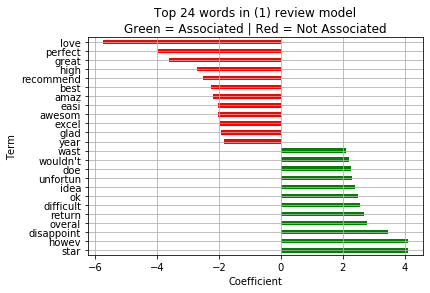

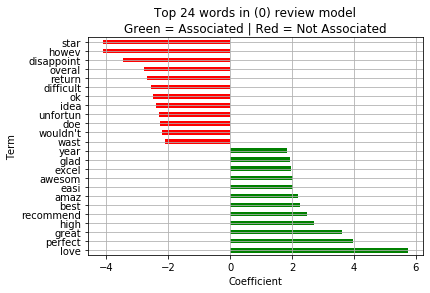

In [57]:
%matplotlib inline

def plot_coef(title, model, feature_names, n_words):
    v = []
    for topic_idx, topic in enumerate(model.coef_):
        [v.append([feature_names[i], model.coef_.item(i)]) for i in topic.argsort()[:-n_words - 1:-1]]
        [v.append([feature_names[i], model.coef_.item(i)]) for i in topic.argsort()[0:n_words]]
    df = pd.DataFrame(v, columns=['Term','Coefficient']).sort_values(by='Coefficient',ascending=False)
    df['c'] = df['Coefficient']>0
    ax = df.plot(x='Term', y='Coefficient', kind='barh', color=df['c'].map({True: 'g', False: 'r'}), grid=True, legend=False,
           title=title)
    ax.set_xlabel("Coefficient")

n_terms = 12
for c in range(0,len(outcome_rating_less_than_5)):
    plot_coef('Top {N} words in ({R}) review model\nGreen = Associated | Red = Not Associated'.format(N=n_terms*2, R=outcome_rating_less_than_5[c]), 
              lr_m[c], tfidf_m.get_feature_names(), n_terms)

In [58]:
def test_review(text):
    test_str = [text]
    test_new = tfidf_m.transform(test_str)

    print('Review text: "{R}"\n'.format(R=test_str[0]))
    print('Model Predction')
    for m in range(0,1):
        print('Model ({M}): {P:.1%}'.format(M = outcome_rating_less_than_5[m], P=lr_m[m].predict_proba(test_new)[0][1]))

In [59]:
test_review('This is the best toaster oven I have ever owned! I am glad I bought it.')
print("Here we can see that the model predicts that there is only an 8.6% chance that the rating for this review is less than 5, which means it is more than 90% confident it has a review of 5 stars")

Review text: "This is the best toaster oven I have ever owned! I am glad I bought it."

Model Predction
Model (1): 10.2%
Here we can see that the model predicts that there is only an 8.6% chance that the rating for this review is less than 5, which means it is more than 90% confident it has a review of 5 stars


In [60]:
test_review('I bought these knives last week. I immediately returned these when they arrived damaged.')

Review text: "I bought these knives last week. I immediately returned these when they arrived damaged."

Model Predction
Model (1): 62.8%


In [61]:
test_review('No scent, is an amazing cleaner and does not feel oily when applied.')

Review text: "No scent, is an amazing cleaner and does not feel oily when applied."

Model Predction
Model (1): 63.6%


In [62]:
test_review('Bought this iron, but it is okay')
print("Here we can see that it is almost 75% confident that the rating is less than 5 stars")

Review text: "Bought this iron, but it is okay"

Model Predction
Model (1): 69.5%
Here we can see that it is almost 75% confident that the rating is less than 5 stars


In [63]:
print("We can see the the results do match our intial guess made while just reading the reviews. While our prediction for whether or not a review has a rating less than 5 seems to be working, it we could increase the accuracy by further dividing the ratings into ranges aka low,medium and high and then predicting them based on the reviews. We are tuning the ratings parameter to better train our model")

We can see the the results do match our intial guess made while just reading the reviews. While our prediction for whether or not a review has a rating less than 5 seems to be working, it we could increase the accuracy by further dividing the ratings into ranges aka low,medium and high and then predicting them based on the reviews. We are tuning the ratings parameter to better train our model


In [64]:
cat = ['low','neutral','high']
def cat_y(y):
    if y<=2.0:
        return cat[0]
    elif y>=4.0:
        return cat[2]
    else:
        return cat[1]

def get_reviews(df):
    df = df[df['review'].apply(lambda x: len(x.split())>=45)]
    df['bucket'] = df['rating'].apply(cat_y)
    return df

data = get_reviews(amzrev_df_sample)
pd.set_option('display.max_colwidth', -1)
data.sample(3)

,date,summary,review,rating,outcome_rating_less_than_5,bucket
102813,2013-02-08,"Decent value for the price, but it's kind of noisy, and hard.","Well, this product has helped a lot with our infant son, can be used to sooth him or for naps. Here are the pros and cons...Pros: plugs in to wall so you don't waste batteries, spinning mobile makes a grinding noise that is actually a good &#34;white noise&#34; sound and seems to help sooth our kid to sleep, 2 music sounds, fair well constructed, good price, 3 rotation positions and 2 seat incline positions.Cons: This thing tends to make a clicking noise as it rocks unless it's positioned in just the right spot, does not rock as well in the side position as it does in the front/back positions, speed modes don't seem to make that much of a difference, the seat is somewhat hard with minimal padding, the tray snaps in and is hard to take off. I've seen other units where the tray has a hinge so you can open it to take your kid our easier, this tray is a PITA.Despite the cons list, I still give it 4 stars because it works overall and was a lot cheaper than buying it locally. Overall I'm happy with the purchase but it's not a perfect device.",4,1,high
68632,2011-10-28,Just OK,"I've been using these wet bags for close to 2 years. They are ok, but within the last few months the drawstrings just don't tighten all the way anymore. It can be done, but takes too much time. I much prefer my wet bag with a zipper closure. I did think they would be larger than what they ended up being, but they work fine. I fit maybe 3-4 one-size pocket diapers and wipes in each, which is large enough for most of my outings.",3,1,neutral
127079,2013-01-27,Nothing spectacular,"These were the very first straw sippies my daughter ever tried. Just before her first birthday we introduced sippy cups to make weaning her off the bottle easier. She took right to them, and to this day prefers sippy cups with straws over ones with spouts. The Nuby No-Spill Flip-It Cup is ""OK"". We've tried many different kinds - this one isn't the best, but it's not the worst either. To address some of the issues other reviewers have experienced: Yes, it can leak from the cap. The straw seems pretty leak-proof, but occasionally, liquid will leak from under the cap. Not a lot, but enough to be annoying. No-spill, yes; no-leak, no. Yes, your baby has to ""bite"" the straw to get liquid out. I thought this was strange, and expected my child to have some difficulty, but she got the hang of it right away. Either she's smarter than I am, or that's how babies naturally suck. Yes, it is SUPER frustrating to get the straw back through the cap if you take it out - the secret to putting it back is to remove the flip part, it pops on and off fairly simply. If you can look past all those, the pros are these: Easy to grip, love the flip-top feature which keeps the straw clean when not in use, and it's relatively easy to clean. We have bought 2 of these, and have since sent them to baby girl's daycare for her to use there. I don't think I'll be buying any more for the house, since I much prefer these:Munchkin Click Lock 2 Count Flip Straw Cup, 9 ounce",3,1,neutral


In [66]:
n_components = 10

def get_lda(data, topics):
    m = LatentDirichletAllocation(n_components = topics, n_jobs=-1, learning_method='online').fit(data)
    d = m.transform(data)
    return m, d

def get_kmeans(data, k, scale=True):
    if scale:
        s = MinMaxScaler()
        data = s.fit_transform(data)
    
    m = KMeans(n_clusters=k).fit(data)
    d = m.predict(data)
    return m, d        

lda_m, lda_d = get_lda(tf_d, n_components)
kmean_m, kmean_d = get_kmeans(tfidf_d, n_components, scale=False)

In [67]:
def show_topics(model, feature_names, n_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-n_words - 1:-1]]))
    print()
    
def show_cluster_topics(cluster_labels, tf_matrix, feature_names, n_words):
    d = pd.DataFrame(tf_matrix.toarray())
    d['c'] = cluster_labels
    d = d.groupby('c').sum().T
    
    for col in d:
        top_n = d[col].nlargest(n_words).index.tolist()
        print("Cluster #%d:" % col)
        print(", ".join([feature_names[i]
                for i in top_n]))
    print()
    
print("Top 15 stemmed words per topic in LDA model\n")
show_topics(lda_m, tf_m.get_feature_names(), 15)

Top 15 stemmed words per topic in LDA model

Topic #0:
use, just, like, babi, cup, tri, work, time, don't, becaus, make, month, onli, littl, thing
Topic #1:
bottl, pump, use, nippl, milk, work, breast, brush, clean, oz, medela, time, onli, brown, feed
Topic #2:
color, look, love, veri, great, product, sheet, pictur, nice, nail, light, good, like, unit, bright
Topic #3:
love, babi, toy, like, month, littl, play, son, veri, old, great, just, realli, crib, easi
Topic #4:
sound, babi, warm, like, veri, time, new, hot, year, love, sleep, use, blanket, differ, review
Topic #5:
diaper, bag, use, wash, cover, cloth, wipe, fit, size, chang, great, veri, love, babi, soft
Topic #6:
chair, tray, mat, bib, high, sit, tabl, clean, potti, easi, use, link, great, recommend, toilet
Topic #7:
seat, babi, use, stroller, car, veri, strap, love, comfort, sleep, easi, like, fit, month, fold
Topic #8:
monitor, night, pillow, room, swaddl, batteri, work, camera, hear, video, turn, babi, sound, power, plug
Top

In [68]:
print("Top 15 stemmed words per cluster in Kmeans model\n")
show_cluster_topics(kmean_d, tfidf_d, tfidf_m.get_feature_names(), 15)

Top 15 stemmed words per cluster in Kmeans model

Cluster #0:
skin, product, use, hair, cream, face, scent, feel, like, moistur, veri, shave, soap, smell, appli
Cluster #1:
babi, use, love, food, like, month, easi, chair, veri, great, just, time, littl, becaus, sleep
Cluster #2:
toy, love, play, month, old, babi, son, like, daughter, littl, chew, great, fun, bath, just
Cluster #3:
diaper, bag, cloth, use, wipe, chang, fit, great, just, pail, love, pocket, wash, babi, like
Cluster #4:
cup, sippi, straw, leak, drink, spout, spill, lid, son, use, clean, month, love, water, like
Cluster #5:
great, use, work, veri, like, love, just, good, littl, product, realli, easi, son, time, look
Cluster #6:
seat, car, stroller, use, easi, veri, strap, instal, fit, love, like, great, babi, potti, britax
Cluster #7:
bottl, pump, nippl, use, milk, breast, work, clean, babi, medela, avent, just, brush, time, like
Cluster #8:
crib, blanket, sheet, mattress, soft, swaddl, fit, pad, chang, perfect, babi, slee

In [69]:
def get_svd(data, components):
    svd = TruncatedSVD(n_components=components).fit(data)
    o = pd.DataFrame(svd.transform(data), columns=range(0,components))
    return svd,o

def get_tsne(data, components, perplexity):
    tsne = TSNE(n_components=components, perplexity=perplexity, n_iter=1000)
    o = pd.DataFrame(tsne.fit_transform(data), columns=range(0,components))
    return tsne,o

svd_v, svd_m = get_svd(tfidf_d, 50)
tnse_v, tsne_m = get_tsne(svd_m, 2, 25)

lda_c = lda_d.argmax(axis=1)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

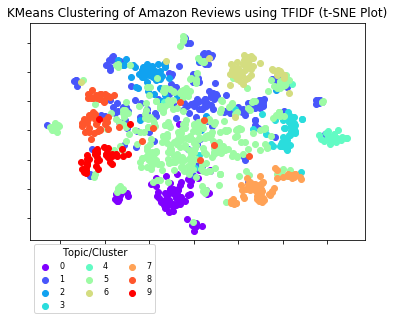

In [70]:
def plot_scatter_2d(x, y, c, sample_size, title):
    df = pd.DataFrame({'x': x, 'y': y, 'c': c}).sample(sample_size)
    l = len(np.unique(c))
    
    ax = plt.subplot(111)
    colors = cm.rainbow(np.linspace(0, 1, l))
                                   
    for c in range(0,l):
        qq = df[df['c']==c]
        ax.scatter(qq['x'], qq['y'],c=colors[c], label=c)
    plt.legend(loc='upper left', numpoints=1, ncol=3, fontsize=8, bbox_to_anchor=(0, 0), title='Topic/Cluster')
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.set_title(title)
    plt.show()

%matplotlib inline
plot_scatter_2d(tsne_m[0], tsne_m[1], kmean_d, 1000, 'KMeans Clustering of Amazon Reviews using TFIDF (t-SNE Plot)')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

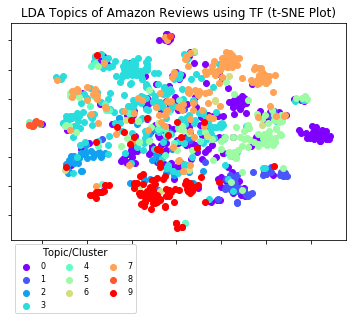

In [71]:
%matplotlib inline
plot_scatter_2d(tsne_m[0], tsne_m[1], lda_c, 1000, 'LDA Topics of Amazon Reviews using TF (t-SNE Plot)')

In [72]:
print("Thus we see that logistic regression model performs the best.The combined model also performs well but for the sake of efficiency LR does a better job, without a higher complexity as seen in th ecombined model")

Thus we see that logistic regression model performs the best.The combined model also performs well but for the sake of efficiency LR does a better job, without a higher complexity as seen in th ecombined model


In [73]:
#References : used previous assignment code chunks, stackoverflow for new libraries and tsne-ing graphs